In [559]:
import numpy as np
import pandas as pd 

# Library Import & Data Loading

In [561]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV 
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


## df as Train dataset and df2 as Test dataset

In [563]:
df = pd.read_csv('churn-bigml-80.csv')
df2 = pd.read_csv('churn-bigml-20.csv')

# Exploratory Data Analysis (EDA)
## Data Exploration and Cleaning.
### Check the null value and duplicate value of df and df2 dataset.
### Check the correlation of Churn with other variable.

In [565]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [567]:
df.shape

(2666, 20)

In [568]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [569]:
df.duplicated().sum()

0

In [570]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [571]:
df2.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [572]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [573]:
df2.shape

(667, 20)

In [574]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [575]:
df2.duplicated().sum()

0

In [576]:
df2.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


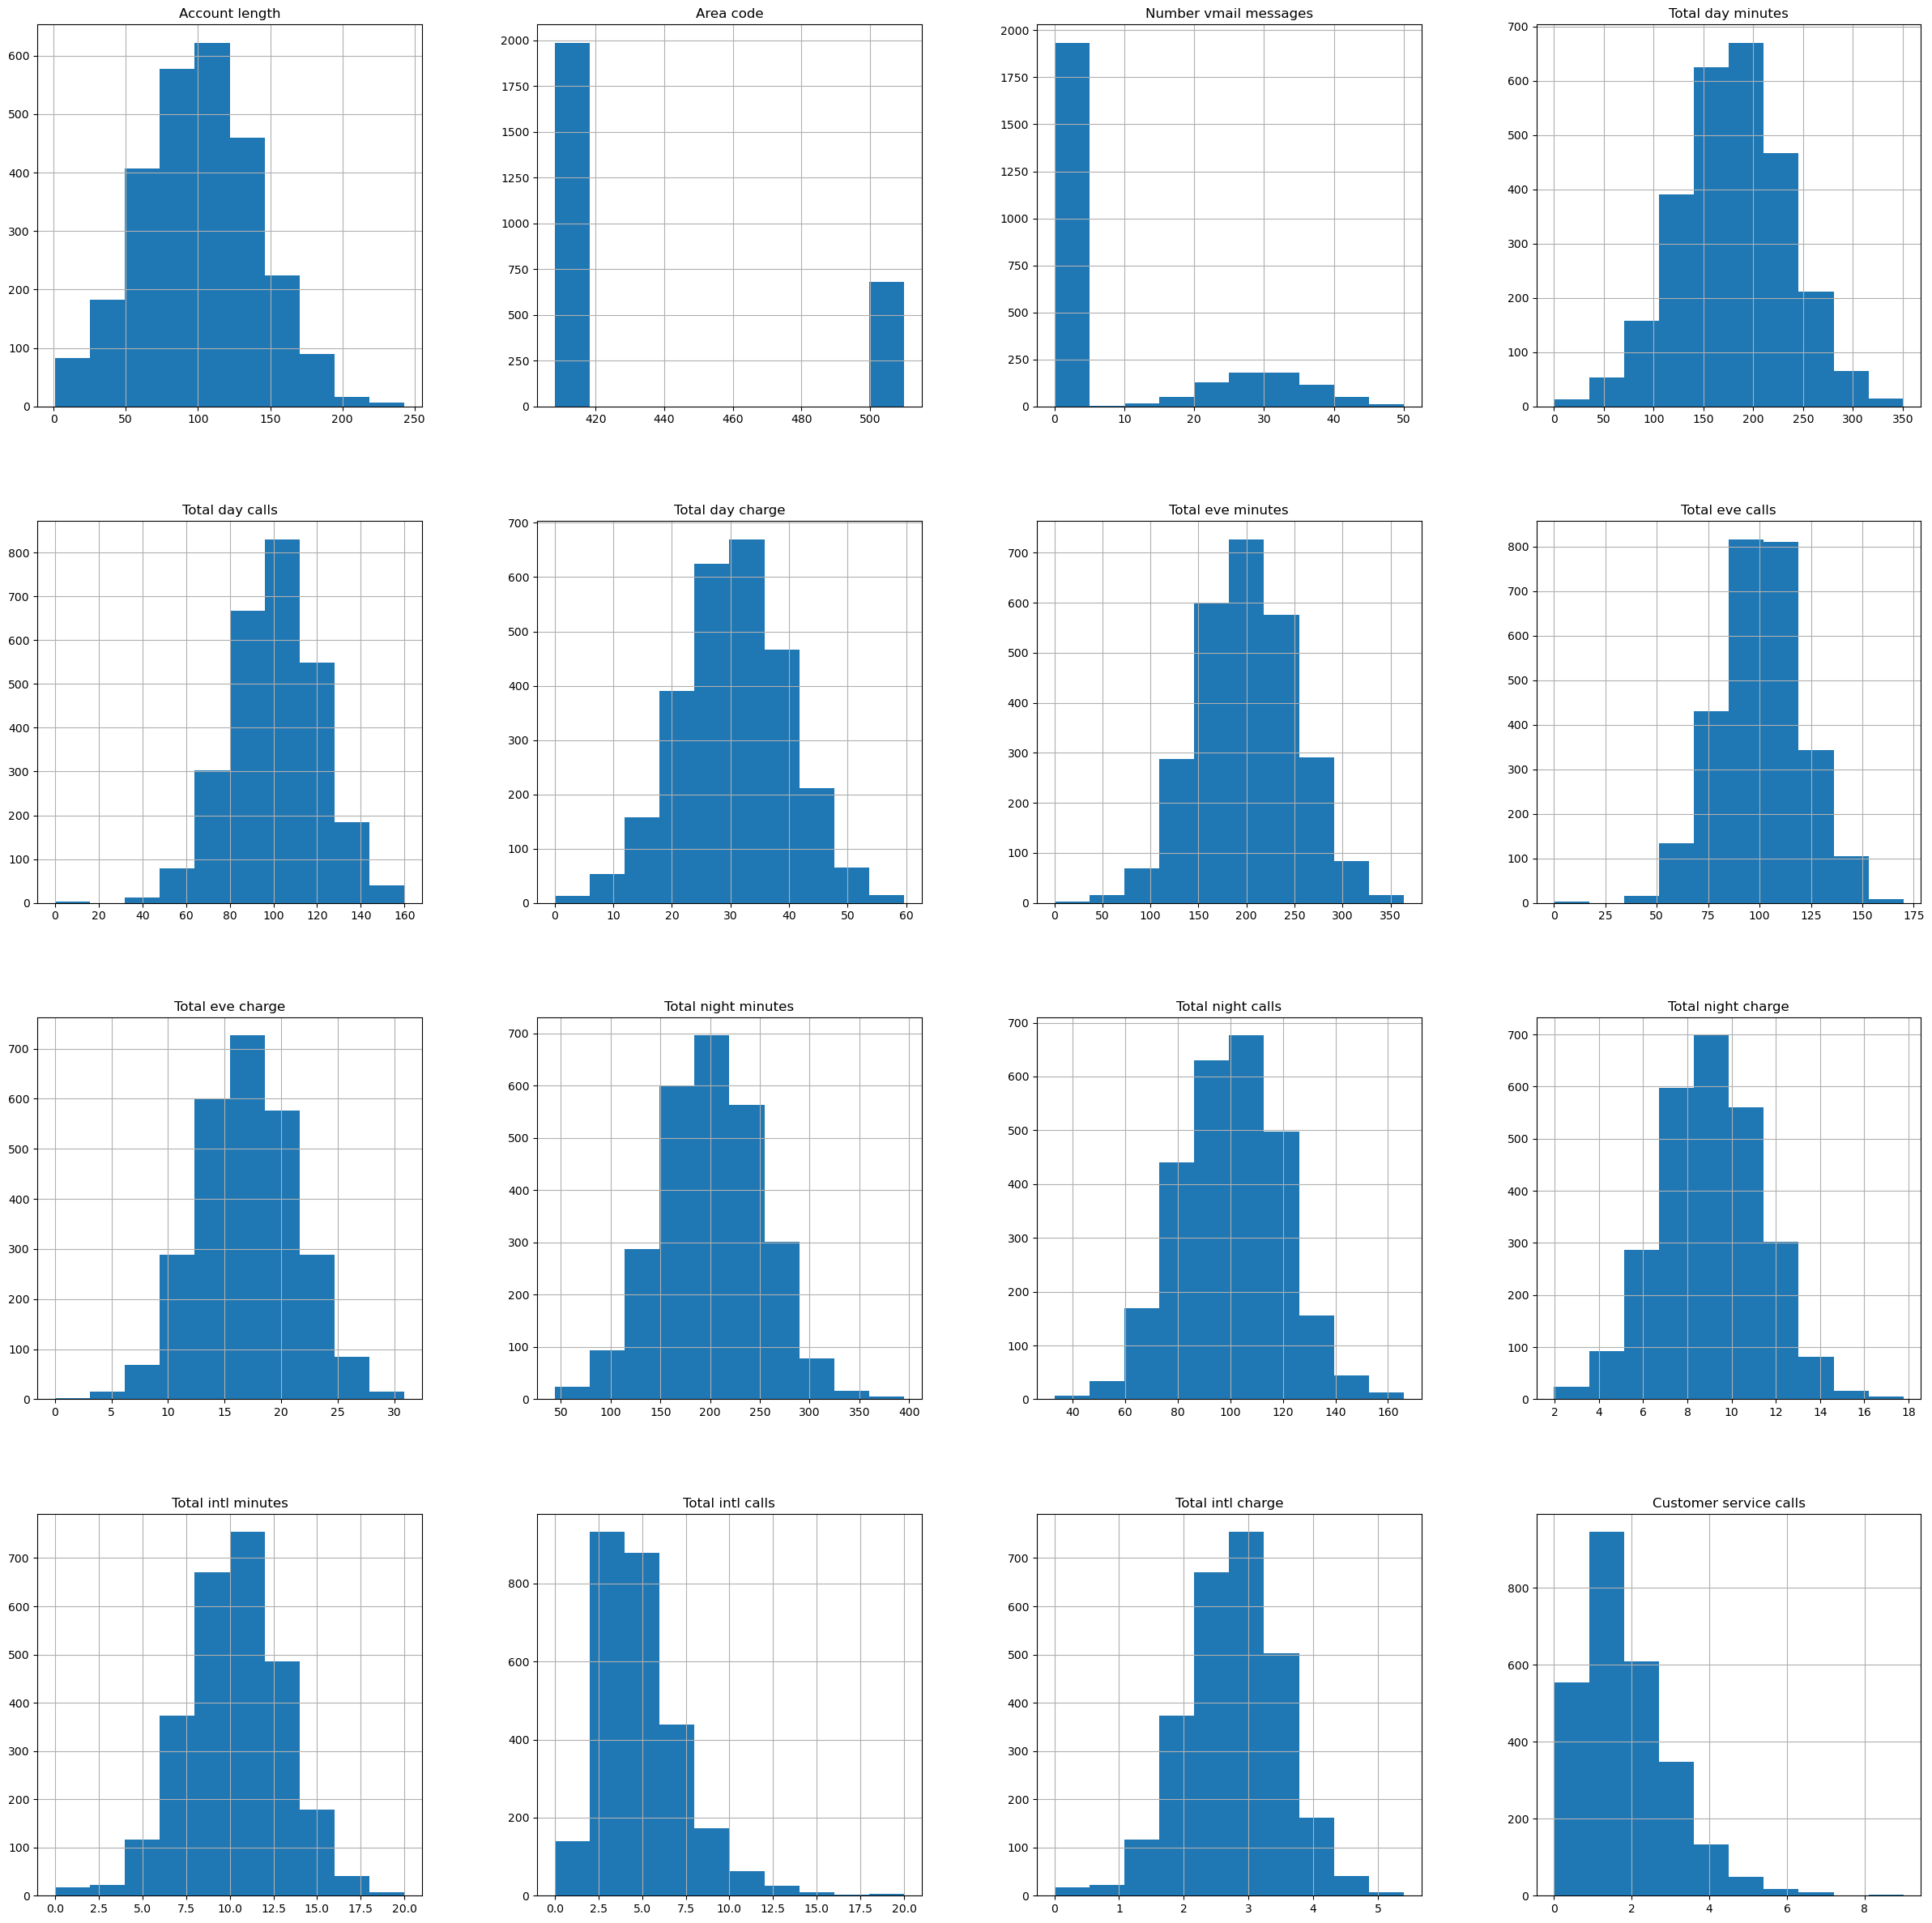

In [577]:
df.hist(figsize = (30,30))
plt.show()

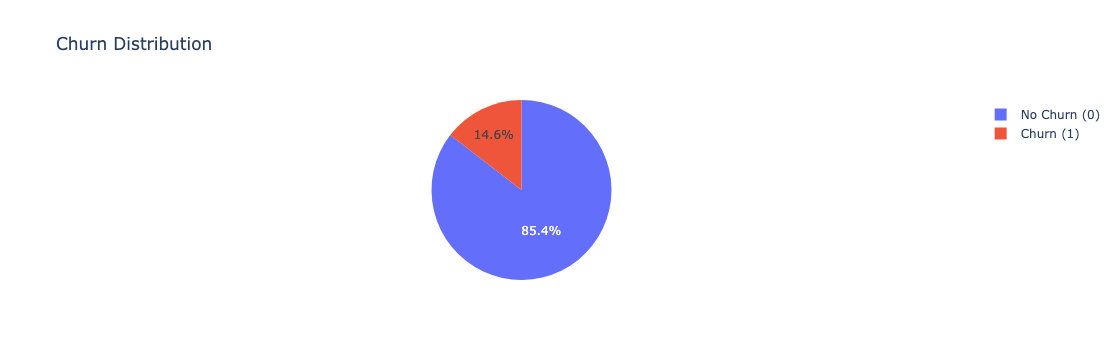

In [578]:
c_count = df['Churn'].value_counts()
fig = go.Figure(data=[go.Pie(labels=['No Churn (0)', 'Churn (1)'], 
                             values=c_count)])

fig.update_layout(title='Churn Distribution')

fig.show()

Based how the pie chart show that 14.6% customer has churn and 85.4% not churn. 

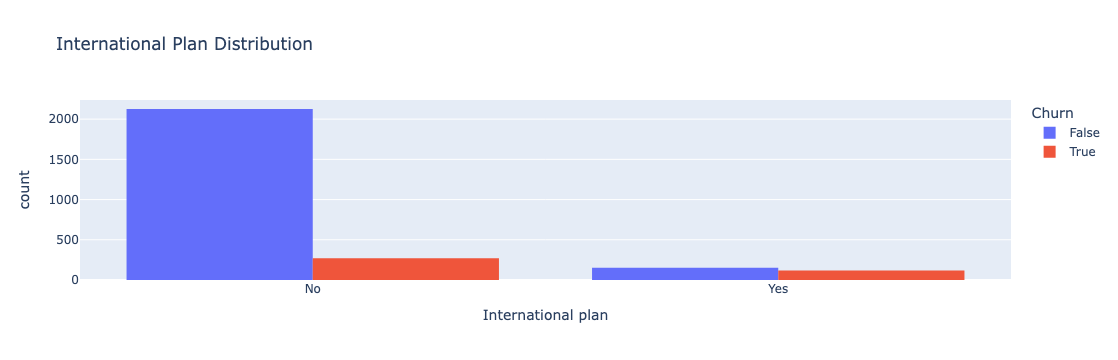

In [580]:
fig = px.histogram(df, x = 'International plan',
                   color = 'Churn',
                   title='International Plan Distribution',
                  barmode='group')
fig.show()

Most of the customers are no using the international plan.

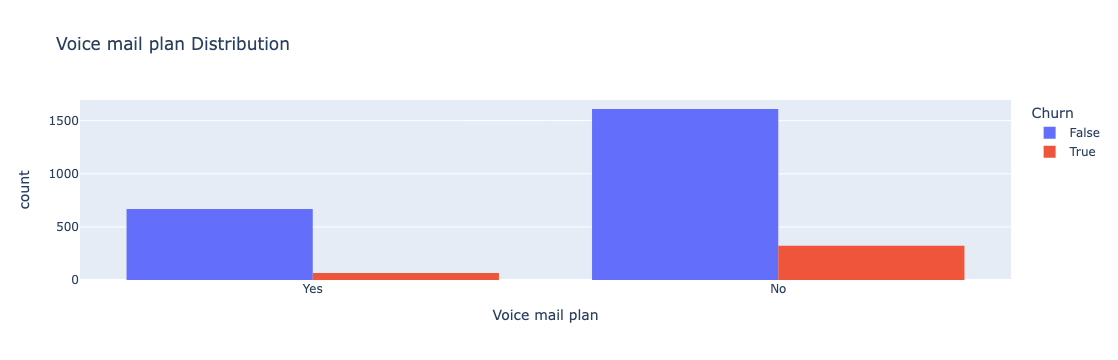

In [582]:
fig = px.histogram(df, x = 'Voice mail plan',
                   color = 'Churn',
                   title='Voice mail plan Distribution',
                  barmode='group')
fig.show()

Most of the customers are no using the Voice mail plan.

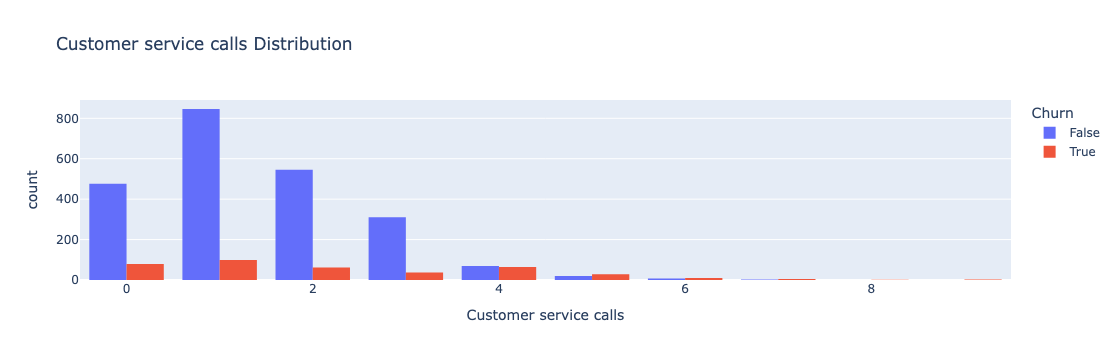

In [584]:
fig = px.histogram(df, x = 'Customer service calls',
                   color = 'Churn',
                   title='Customer service calls Distribution',
                  barmode='group')
fig.show()

Many customers who churn only call customer services once.

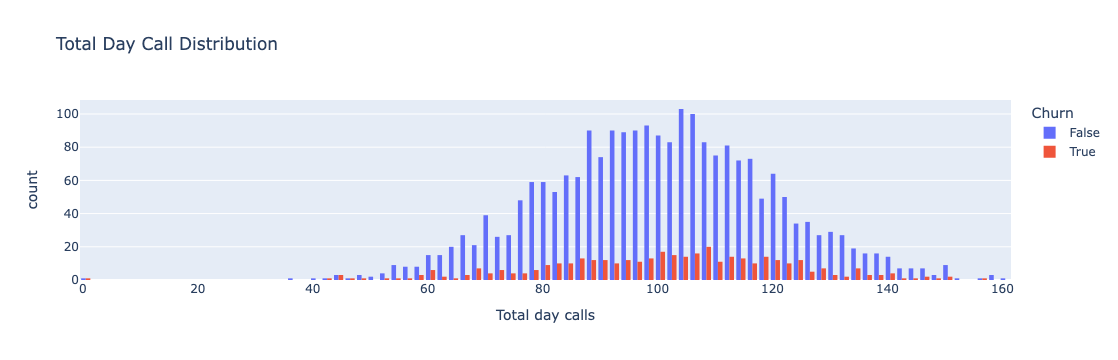

In [586]:
fig = px.histogram(df, x = 'Total day calls',
                   color = 'Churn',
                   title='Total Day Call Distribution',
                  barmode='group')
fig.show()

Most of customer churn perhaps they call volume are fewer.

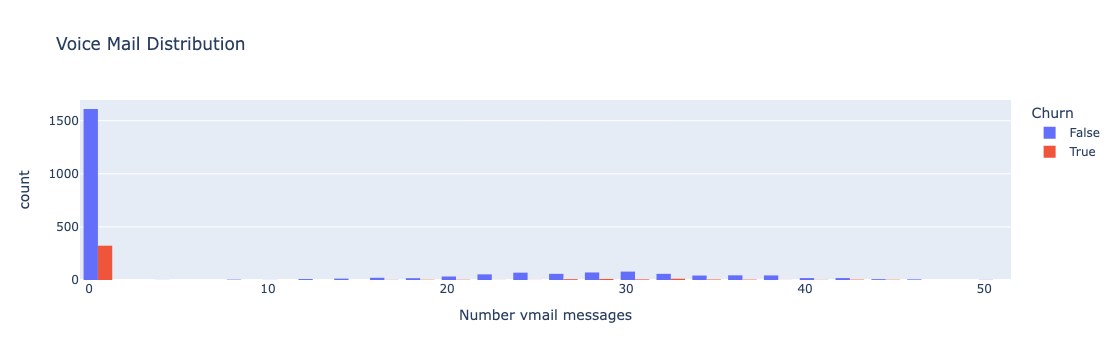

In [588]:
fig = px.histogram(df, x = 'Number vmail messages',
                   color = 'Churn',
                   title='Voice Mail Distribution',
                  barmode='group')
fig.show()

Most of customer churn perhas they used voice mail volume are fewer.

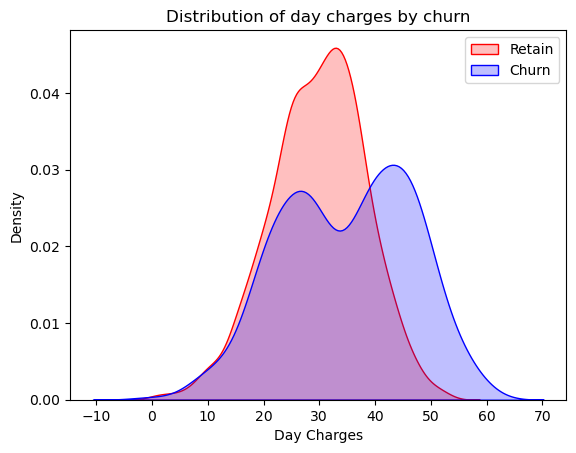

In [590]:
ax = sns.kdeplot(df[df.Churn== False]['Total day charge'],
               color = "Red", fill=True)
ax = sns.kdeplot(df[df.Churn== True]['Total day charge'],
               color = "Blue", fill=True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

# Display the plot
plt.show()

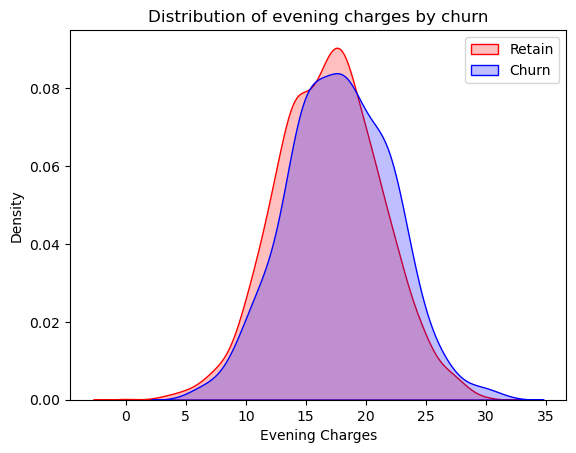

In [591]:
ax = sns.kdeplot(df[df.Churn== False]['Total eve charge'],
               color = "Red", fill=True)
ax = sns.kdeplot(df[df.Churn== True]['Total eve charge'],
               color = "Blue", fill=True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

plt.show()

## Feature Engineering

In [593]:
df.drop(['Area code', 'State'], axis=1, inplace=True)

In [594]:
df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [595]:
df2.drop(['Area code', 'State'], axis = 1, inplace = True)

In [596]:
df2.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,65,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,161,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,111,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,49,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


### Generate dummy variables and designate 'df' and 'df2' as the training and test datasets, respectively.

In [598]:
train = pd.get_dummies(df)

In [599]:
train.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,True,False,False,True
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,True,False,False,True
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,True,False,True,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,False,True,True,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,False,True,True,False


In [600]:
test = pd.get_dummies(df2)

In [601]:
test.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,True,False,True,False
1,65,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,True,False,True,False
2,161,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,True,False,True,False
3,111,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False,True,False,True,False
4,49,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False,True,False,True,False


### Create variables 'X' and 'y' for both the training and test datasets.

In [603]:
X_train = train.drop('Churn', axis=1)
y_train = train['Churn']

In [604]:
X_test = test.drop('Churn', axis=1)
y_test = test['Churn']

In [605]:
# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Compare summary statistics of features and target
print("X_train summary:\n", X_train.describe())
print("X_test summary:\n", X_test.describe())
print("y_train summary:\n", y_train.describe())
print("y_test summary:\n", y_test.describe())

X_train shape: (2666, 19)
X_test shape: (667, 19)
y_train shape: (2666,)
y_test shape: (667,)
X_train summary:
        Account length  Number vmail messages  Total day minutes  \
count     2666.000000            2666.000000         2666.00000   
mean       100.620405               8.021755          179.48162   
std         39.563974              13.612277           54.21035   
min          1.000000               0.000000            0.00000   
25%         73.000000               0.000000          143.40000   
50%        100.000000               0.000000          179.95000   
75%        127.000000              19.000000          215.90000   
max        243.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733    

# Construct Model

## Train And Evaluate Support Vector Machine (SVM)

In [608]:
# svm = LinearSVC(max_iter = 20000)
# svm = CalibratedClassifierCV(svm)
# svm.fit(X_train, y_train)

In [609]:
y_predict = svm.predict(X_test)

In [610]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.86      0.99      0.92       572
        True       0.43      0.06      0.11        95

    accuracy                           0.85       667
   macro avg       0.65      0.52      0.52       667
weighted avg       0.80      0.85      0.81       667



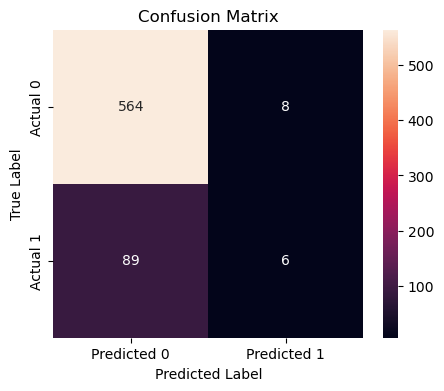

Confusion Matrix:
[[564   8]
 [ 89   6]]


In [611]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)

## Train And Evaluate Ramdom Forest

In [613]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [614]:
y_predict = rf.predict(X_test)

In [615]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       572
        True       0.96      0.73      0.83        95

    accuracy                           0.96       667
   macro avg       0.96      0.86      0.90       667
weighted avg       0.96      0.96      0.95       667



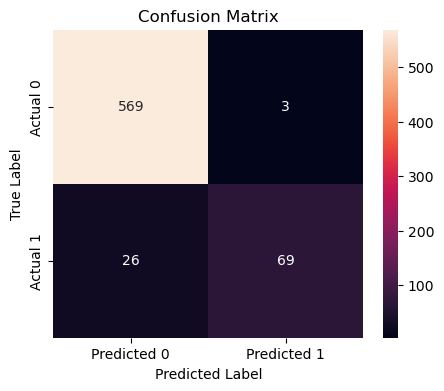

Confusion Matrix:
[[569   3]
 [ 26  69]]


In [616]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)

## Train And Evaluate K-Nearest Neighbors (KNN)

In [618]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [619]:
y_predict = knn.predict(X_test)

In [620]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.90      0.98      0.94       572
        True       0.72      0.38      0.50        95

    accuracy                           0.89       667
   macro avg       0.81      0.68      0.72       667
weighted avg       0.88      0.89      0.88       667



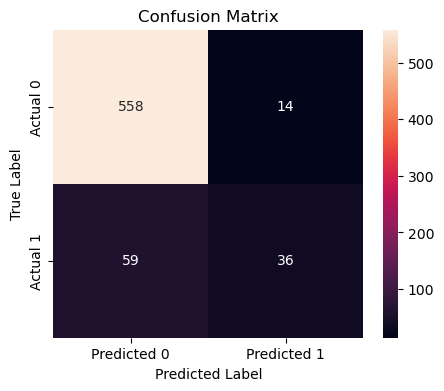

Confusion Matrix:
[[558  14]
 [ 59  36]]


In [621]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)

## Train And Evaluate Naive Bayes

In [623]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [624]:
y_predcit = nb.predict(X_test)

In [625]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.90      0.98      0.94       572
        True       0.72      0.38      0.50        95

    accuracy                           0.89       667
   macro avg       0.81      0.68      0.72       667
weighted avg       0.88      0.89      0.88       667



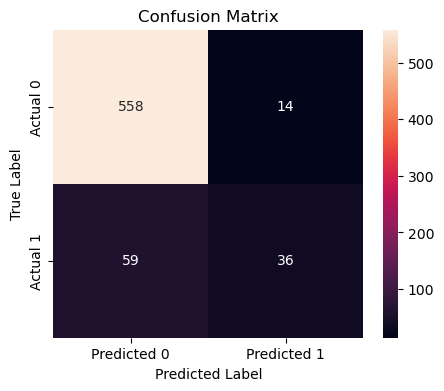

Confusion Matrix:
[[558  14]
 [ 59  36]]


In [626]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)

## Obtain ROC Curves and AUC Scores

In [628]:
auc_score1 = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])

print("Support Vector Machine: ", auc_score1) # Support Vector Machine
print("Random Forest: ", auc_score2) # Random Forest
print("K-Nearest Neighbors: ", auc_score3) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score4) # Naive Bayes

Support Vector Machine:  0.7612808244387191
Random Forest:  0.9294902465955097
K-Nearest Neighbors:  0.7237578211262421
Naive Bayes:  0.8459514170040486


In [629]:
fpr1, tpr1, thresh1 = roc_curve(y_test, svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, nb.predict_proba(X_test)[:, 1], pos_label = 1)


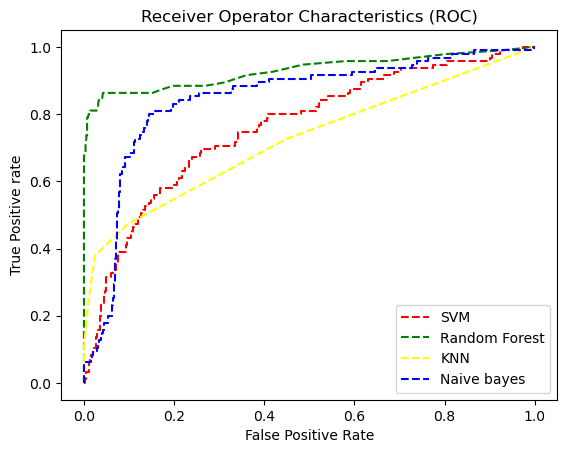

In [630]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr2, tpr2, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr3, tpr3, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr4, tpr4, linestyle = "--", color = "blue", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

### Random Forest Model obtain the highest AUC and ROC score. 

In [632]:
y_predict = rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       572
        True       0.96      0.73      0.83        95

    accuracy                           0.96       667
   macro avg       0.96      0.86      0.90       667
weighted avg       0.96      0.96      0.95       667



1. **AUC**      : 93.1%
2. **Precision**: 95% labeled as not churn customers and 93% labeled as churn customers. 
3. **recall**   : 99% labeled as not churn customers and 72% labeled as churn customers. 
4. **f1-score** : 97% labeled as not churn customers and 81% labeled as churn customers. 
5. **Accuracy** : 95%

In [634]:
# Plot the feature importance
X = train.drop('Churn', axis=1)

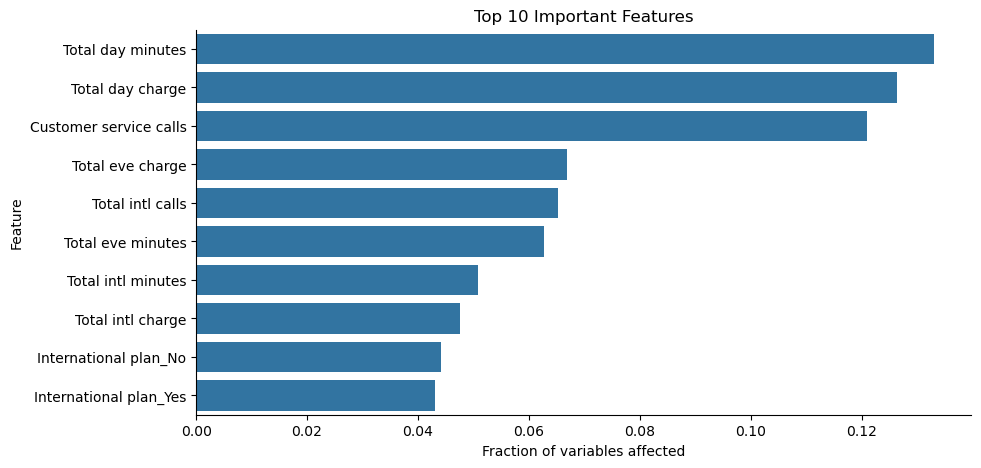

In [635]:
feat_scores = pd.DataFrame({"Fraction of variables affected": rf.feature_importances_}, index=X.columns)
feat_scores = feat_scores.sort_values(by="Fraction of variables affected", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=feat_scores["Fraction of variables affected"], y=feat_scores.index)
plt.xlabel("Fraction of variables affected")
plt.ylabel("Feature")
plt.title("Top 10 Important Features")
sns.despine()
plt.show()

# Conclusion

## Random Forest Model obtain the highest score compare to other model.
1. **AUC**      : 93.1%
2. **Precision**: 95% labeled as not churn customers and 93% labeled as churn customers. 
3. **recall**   : 99% labeled as not churn customers and 72% labeled as churn customers. 
4. **f1-score** : 97% labeled as not churn customers and 81% labeled as churn customers. 
5. **Accuracy** : 95%

From the important feature plot shows that **"Total day charge"**, **'Total day minutes'** and **'Customer service calls'** are the important variable for **predicting** the outcome variable, **"Churn"**.

## Next Step, may import the GridSearchCV to obtain the best score.